In [1]:
#train a machine learning algorithm on the fashion mnist dataset
#using a convolutional neural network
#the mnist dataset is a dataset of 60,000 28x28 grayscale images of 10 fashion categories

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import sweetviz as sv
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize

In [2]:
#load the dataset into a pandas dataframe separating training and testing data
train_df = pd.read_csv('fashion-mnist_train.csv')
test_df = pd.read_csv('fashion-mnist_test.csv')


In [3]:
#separate the labels and the features
x_train = train_df.drop("label", axis=1).values
y_train = train_df["label"].values
x_test = test_df.drop("label", axis=1).values
y_test = test_df["label"].values

In [4]:
#reshape the data to fit the model
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)


In [5]:
#normalize the grayscale values to lie between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [6]:
#build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [7]:
#train the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 26s 13ms/step - loss: 0.6746 - accuracy: 0.7510
Epoch 2/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.4728 - accuracy: 0.8293
Epoch 3/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.4084 - accuracy: 0.8536
Epoch 4/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.3702 - accuracy: 0.8691
Epoch 5/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3400 - accuracy: 0.8786
Epoch 6/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.3216 - accuracy: 0.8846
Epoch 7/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3067 - accuracy: 0.8896
Epoch 8/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2878 - accuracy: 0.8968
Epoch 9/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2756 - accuracy: 0.8994
Epoch 10/10
1875/1875 [==============================] - 27s 14m

In [8]:
#test the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

313/313 - 2s - loss: 0.2433 - accuracy: 0.9166 - 2s/epoch - 5ms/step


313/313 [==============================] - 2s 6ms/step


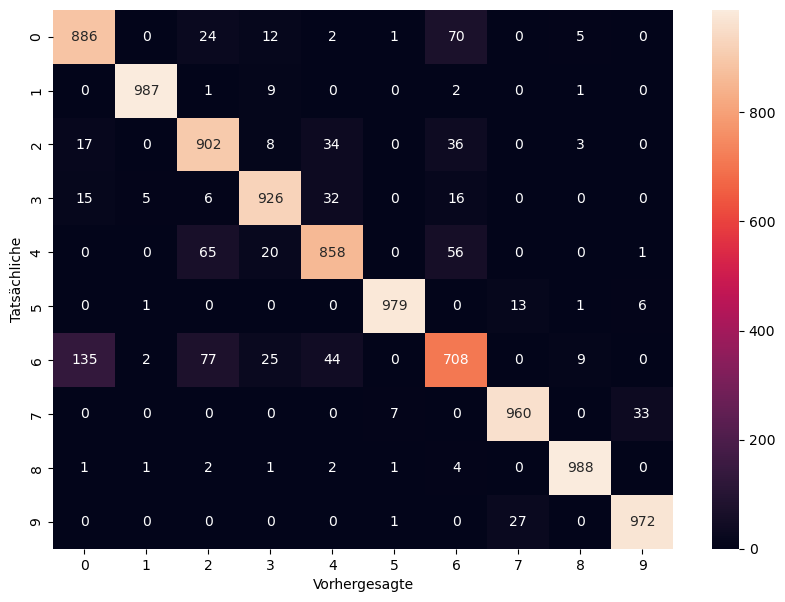

In [9]:
#draw a confusion matrix
y_pred = model.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

#calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

#visualize confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Vorhergesagte')
plt.ylabel('Tatsächliche')
plt.show()


